<a href="https://colab.research.google.com/github/clarisa-suffering/MuseCollection/blob/main/TextWeb_Project_UTS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install pandas
!pip install openpyxl
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.7 MB/s eta 0:00:00


# Sentiment Analysis

Review Beauty of Joseon

In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/TextWeb Project/olive_young_boj_reviews.xlsx")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

df.head(10)

username        date  rating  \
0  by. cy*****  2025/06/09       5   
1  by. an*****  2025/05/24       5   
2  by. v8*****  2025/08/16       5   
3  by. tr*****  2022/07/18       5   
4  by. mu*****  2023/02/09       5   
5  by. ev*****  2023/01/01       5   
6  by. ra*****  2024/08/10       5   
7  by. il*****  2023/09/03       5   
8  by. sh*****  2024/11/07       4   
9  by. mr*****  2022/09/11       5   

                                                                        product_option  \
0  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
1  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
2  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
3  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
4  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
5  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
6  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
7  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
8  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
9  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review_text  
0  I really love how this product feels on my face. It’s very light and goes on really well with no white cast. It’s a great product to have as the last step of your morning skin routine. It’s a must have and I really like all of the Beauty of Joseon products I’ve purchased so far. I’ve also given them as gifts to family and friends especially living in the desert. It also has probiotics which is great for the skin. Will continue to buy in the future. \n\nThis product is a sunscreen soft to the skin to block UV rays. And it also contains soothing ingredients to keep the skin moisturized and more moisture than inorganic sunscreen, which makes it adhere well to the skin.\nThis product comes in a moist cream texture and moisture essence without any oiliness, so it absorbs into the skin well without white residue.\nThis product contains less harmful ingredients, making it safe to use for men and women for all ages throughout the four seasons.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Review D'Alba

In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/TextWeb Project/olive_young_alba_reviews.xlsx")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

df.head(10)

username        date  rating  \
0  by. Korean Customer  2025/08/10       3   
1  by. Korean Customer  2025/08/10       5   
2  by. Korean Customer  2025/08/10       5   
3  by. Korean Customer  2025/08/10       5   
4  by. Korean Customer  2025/08/10       5   
5  by. Korean Customer  2025/08/09       5   
6  by. Korean Customer  2025/08/09       5   
7  by. Korean Customer  2025/08/09       5   
8  by. Korean Customer  2025/08/09       5   
9  by. Korean Customer  2025/08/09       5   

                                           product_option  \
0  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
1  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
2  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
3  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
4         d'Alba Waterfull Tone-Up Sun Cream 50mL  Notice   
5  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
6  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
7  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
8  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
9  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   

                                                                                                                                                                                                              review_text  
0                                                                                                                               a Because it's recommended for dry skin\nI bought it\n I think it fits my skin color well  
1                                                                                             I bought it again because when I put this on makeup, the makeup didn't come off and the tone stayed up for a long time hehe  
2                                                                                                                                         Dalba's sunscreen is famous, hehe, I really like it! I like the natural tone up  
3  It was said that Chu would wear it while watching Reels, so I bought it with complete anticipation, but it was really nice; it definitely toned up the face; it was pink and beige, so vibrant, and it was really nice  
4                                                                                                                 I bought it for the nth time. It moisturizes and tones up very well. I bought it as a gift for a friend  
5                                                                                                                                    I'm using size 21, but it's brighter than I thought. It rises naturally when applied  
6                                                                                                                                                                  It's easy to use, I recommend it, I would buy it again  
7                                                                                                                                It was a gift for adults, and they are using it very well because it is moist and bright  
8                                                                                                                                     It was great at first, but since I keep using it, I don't think it fits my savings.  
9                                                                                                                                  It's summer, so I chose the 1+1 composition hehe, I only use Dalba as a sunscreen hehe

Loading XLM-R sentiment model...


Device set to use cpu



Processing /content/drive/MyDrive/TextWeb Project/olive_young_boj_reviews.xlsx...
Cleaning text data
Running sentiment analysis...


100%|██████████| 5480/5480 [18:45<00:00,  4.87it/s]


Saving results to /content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_boj.xlsx...
Overall Sentiment Distribution:
sentiment_label
positive    4683
negative     449
neutral      348
Name: count, dtype: int64


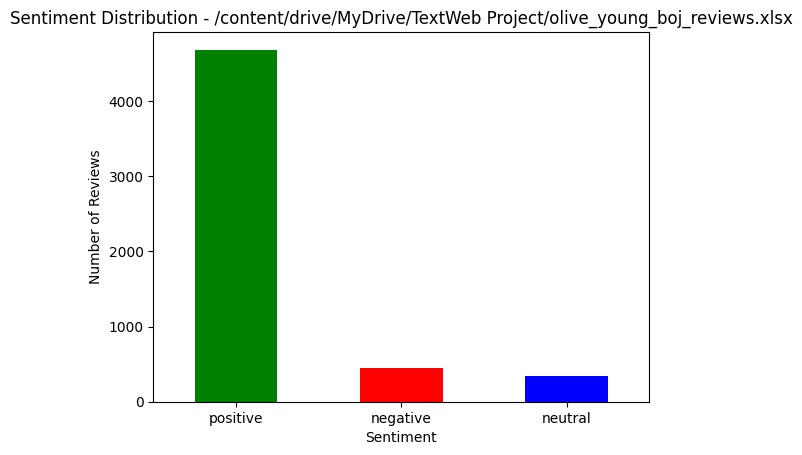


Processing /content/drive/MyDrive/TextWeb Project/olive_young_alba_reviews.xlsx...
Cleaning text data
Running sentiment analysis...


100%|██████████| 3130/3130 [11:53<00:00,  4.39it/s]


Saving results to /content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_alba.xlsx...
Overall Sentiment Distribution:
sentiment_label
positive    2457
negative     354
neutral      319
Name: count, dtype: int64


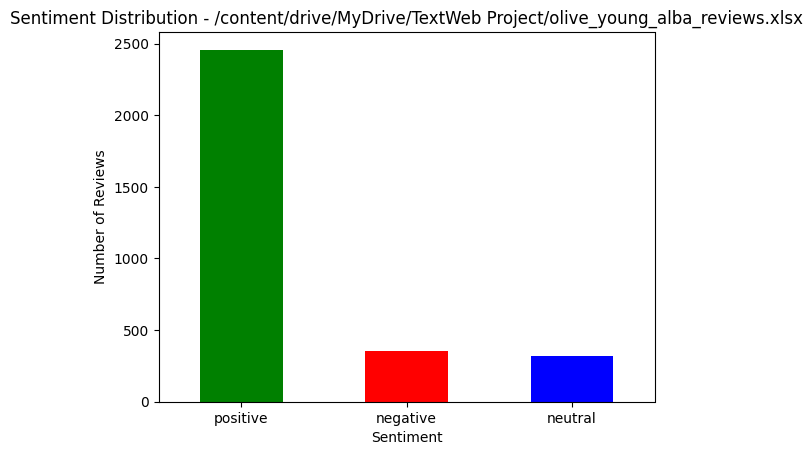


All processing complete!


In [ ]:
import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm
import matplotlib.pyplot as plt

def clean_review_text(text):
    if pd.isna(text):
        return ""

    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # buat HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # buat URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # buat mentions and hashtags
    text = re.sub(r'\S+@\S+', '', text)  # buat emails
    text = re.sub(r'\s+', ' ', text).strip()  # whitespace
    return text


def process_reviews(input_file, output_file):
    print(f"\nProcessing {input_file}...")

    df = pd.read_excel(input_file)

    print("Cleaning text data")
    df['cleaned_review'] = df['review_text'].apply(clean_review_text)

    print("Running sentiment analysis...")
    tqdm.pandas()
    results = df['cleaned_review'].progress_apply(lambda x: sentiment_pipeline(str(x)[:512]))

    df['sentiment_label'] = [res[0]['label'] for res in results]
    df['sentiment_score'] = [res[0]['score'] for res in results]

    # save
    print(f"Saving results to {output_file}...")
    df.to_excel(output_file, index=False)

    # distribution
    sentiment_counts = df['sentiment_label'].value_counts()
    print("Overall Sentiment Distribution:")
    print(sentiment_counts)

    # visualisasi
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(f'Sentiment Distribution - {input_file}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=0)
    plt.show()


print("Loading XLM-R sentiment model...")
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

# run loop sa
files = [
    ("/content/drive/MyDrive/TextWeb Project/olive_young_boj_reviews.xlsx",
     "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_boj.xlsx"),

    ("/content/drive/MyDrive/TextWeb Project/olive_young_alba_reviews.xlsx",
     "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_alba.xlsx")
]

for input_file, output_file in files:
    process_reviews(input_file, output_file)

print("\nAll processing complete!")


In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_boj.xlsx")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

df.head(10)

username        date  rating  \
0  by. cy*****  2025/06/09       5   
1  by. an*****  2025/05/24       5   
2  by. v8*****  2025/08/16       5   
3  by. tr*****  2022/07/18       5   
4  by. mu*****  2023/02/09       5   
5  by. ev*****  2023/01/01       5   
6  by. ra*****  2024/08/10       5   
7  by. il*****  2023/09/03       5   
8  by. sh*****  2024/11/07       4   
9  by. mr*****  2022/09/11       5   

                                                                        product_option  \
0  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
1  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
2  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
3  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
4  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
5  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
6  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
7  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
8  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   
9  Beauty of Joseon Relief Sun: Rice + Probiotics (SPF50+ PA++++) Double Pack 50mL*2ea   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review_text  \
0  I really love how this product feels on my face. It’s very light and goes on really well with no white cast. It’s a great product to have as the last step of your morning skin routine. It’s a must have and I really like all of the Beauty of Joseon products I’ve purchased so far. I’ve also given them as gifts to family and friends especially living in the desert. It also has probiotics which is great for the skin. Will continue to buy in the future. \n\nThis product is a sunscreen soft to the skin to block UV rays. And it also contains soothing ingredients to keep the skin moisturized and more moisture than inorganic sunscreen, which makes it adhere well to the skin.\nThis product comes in a moist cream texture and moisture essence without any oiliness, so it absorbs into the skin well without white residue.\nThis product contains less harmful ingredients, making it safe to use for men and women for all ages throughout the four seasons.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_alba.xlsx")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

df.head(10)

username        date  rating  \
0  by. Korean Customer  2025/08/10       3   
1  by. Korean Customer  2025/08/10       5   
2  by. Korean Customer  2025/08/10       5   
3  by. Korean Customer  2025/08/10       5   
4  by. Korean Customer  2025/08/10       5   
5  by. Korean Customer  2025/08/09       5   
6  by. Korean Customer  2025/08/09       5   
7  by. Korean Customer  2025/08/09       5   
8  by. Korean Customer  2025/08/09       5   
9  by. Korean Customer  2025/08/09       5   

                                           product_option  \
0  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
1  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
2  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
3  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
4         d'Alba Waterfull Tone-Up Sun Cream 50mL  Notice   
5  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
6  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
7  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
8  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   
9  d'Alba Waterfull Tone-Up Sun Cream Duo Set (50mL+50mL)   

                                                                                                                                                                                                              review_text  \
0                                                                                                                               a Because it's recommended for dry skin\nI bought it\n I think it fits my skin color well   
1                                                                                             I bought it again because when I put this on makeup, the makeup didn't come off and the tone stayed up for a long time hehe   
2                                                                                                                                         Dalba's sunscreen is famous, hehe, I really like it! I like the natural tone up   
3  It was said that Chu would wear it while watching Reels, so I bought it with complete anticipation, but it was really nice; it definitely toned up the face; it was pink and beige, so vibrant, and it was really nice   
4                                                                                                                 I bought it for the nth time. It moisturizes and tones up very well. I bought it as a gift for a friend   
5                                                                                                                                    I'm using size 21, but it's brighter than I thought. It rises naturally when applied   
6                                                                                                                                                                  It's easy to use, I recommend it, I would buy it again   
7                                                                                                                                It was a gift for adults, and they are using it very well because it is moist and bright   
8                                                                                                                                     It was great at first, but since I keep using it, I don't think it fits my savings.   
9                                                                                                                                  It's summer, so I chose the 1+1 composition hehe, I only use Dalba as a sunscreen hehe   

                                                                                                                                                                                                           cleaned_review  \
0                                                                                                                                  a because it's recommended for dry skin i bought it

Sentiment Analysis Visualization Pie Chart

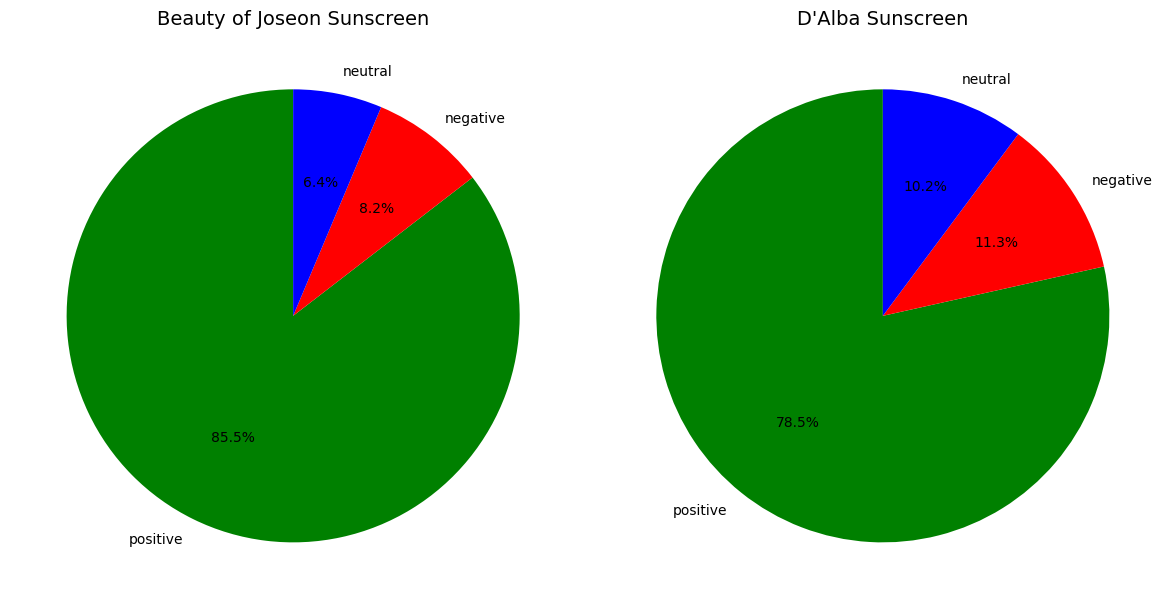

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load
files = [
    "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_boj.xlsx",
    "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_alba.xlsx"
]

all_results = {}

for file in files:
    df = pd.read_excel(file)
    sentiment_percent = df['sentiment_label'].value_counts(normalize=True) * 100
    all_results[file] = sentiment_percent

# pie chart
colors = {"positive": "green", "negative": "red", "neutral": "blue"}
custom_titles = ["Beauty of Joseon Sunscreen", "D'Alba Sunscreen"]

fig, axes = plt.subplots(1, len(all_results), figsize=(12, 6))

for i, (file, sentiment_percent) in enumerate(all_results.items()):
    axes[i].pie(
        sentiment_percent,
        labels=sentiment_percent.index,
        autopct='%1.1f%%',
        colors=[colors.get(lbl, "gray") for lbl in sentiment_percent.index],
        startangle=90
    )
    axes[i].set_title(custom_titles[i], fontsize=14)

plt.tight_layout()
plt.show()


# Aspect Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



--- Preview Stopwords & Normalization for Beauty of Joseon ---


rating  \
0       5   
1       5   
2       5   
3       5   
4       5   
5       5   
6       5   
7       5   
8       4   
9       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    cleaned_review  \
0  i really love how this product feels on my face. it’s very light and goes on really well with no white cast. it’s a great product to have as the last step of your morning skin routine. it’s a must have and i really like all of the beauty of joseon products i’ve purchased so far. i’ve also given them as gifts to family and friends especially living in the desert. it also has probiotics which is great for the skin. will continue to buy in the future. this product is a sunscreen soft to the skin to block uv rays. and it also contains soothing ingredients to keep the skin moisturized and more moisture than inorganic sunscreen, which makes it adhere well to the skin. this product comes in a moist cream texture and moisture essence without any oiliness, so it absorbs into the skin well without white residue. this product contains less harmful ingredients, making it safe to use for men and women for all ages throughout the four seasons.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         this product is very good if you have oily and sensitive skin it has no smell absorbs quickly it's very light, you can't feel it it's lighter than a gel cream and if it protects from the sun it really is very good and i recommend it   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    i really love this sunscreen! it feels light on my skin, absorbs quickly without leaving a white cast, and keeps my face hydrated. perfect under makeup and no irritation at all. will definitely repurchase!   
3                                                          


=== Beauty of Joseon ===
Positive Topics:
Topic #1: 0.038*"feel" + 0.030*"light" + 0.026*"texture" + 0.022*"moisturize" + 0.022*"oily" + 0.020*"hydrate" + 0.016*"dry" + 0.015*"white_cast" + 0.014*"lightweight" + 0.014*"smooth"
Topic #2: 0.040*"make" + 0.018*"oily" + 0.017*"makeup" + 0.017*"feel" + 0.016*"work" + 0.015*"texture" + 0.014*"moisturize" + 0.013*"sensitive" + 0.012*"dry" + 0.012*"super"
Topic #3: 0.025*"repurchase" + 0.022*"white_cast" + 0.019*"amaze" + 0.018*"light_weight" + 0.011*"pack" + 0.011*"come" + 0.011*"pretty" + 0.011*"price" + 0.010*"fast" + 0.010*"texture"
Topic #4: 0.020*"order" + 0.017*"year" + 0.017*"since" + 0.016*"spf" + 0.013*"get" + 0.012*"love" + 0.011*"already" + 0.011*"amaze" + 0.010*"highly_recommend" + 0.010*"tube"
Topic #5: 0.037*"white_cast" + 0.023*"easy" + 0.020*"moisturize" + 0.020*"light" + 0.014*"scent" + 0.013*"greasy" + 0.011*"price" + 0.011*"absorb" + 0.011*"buy" + 0.010*"texture"

Beauty of Joseon - Positive Topics Word Clouds:


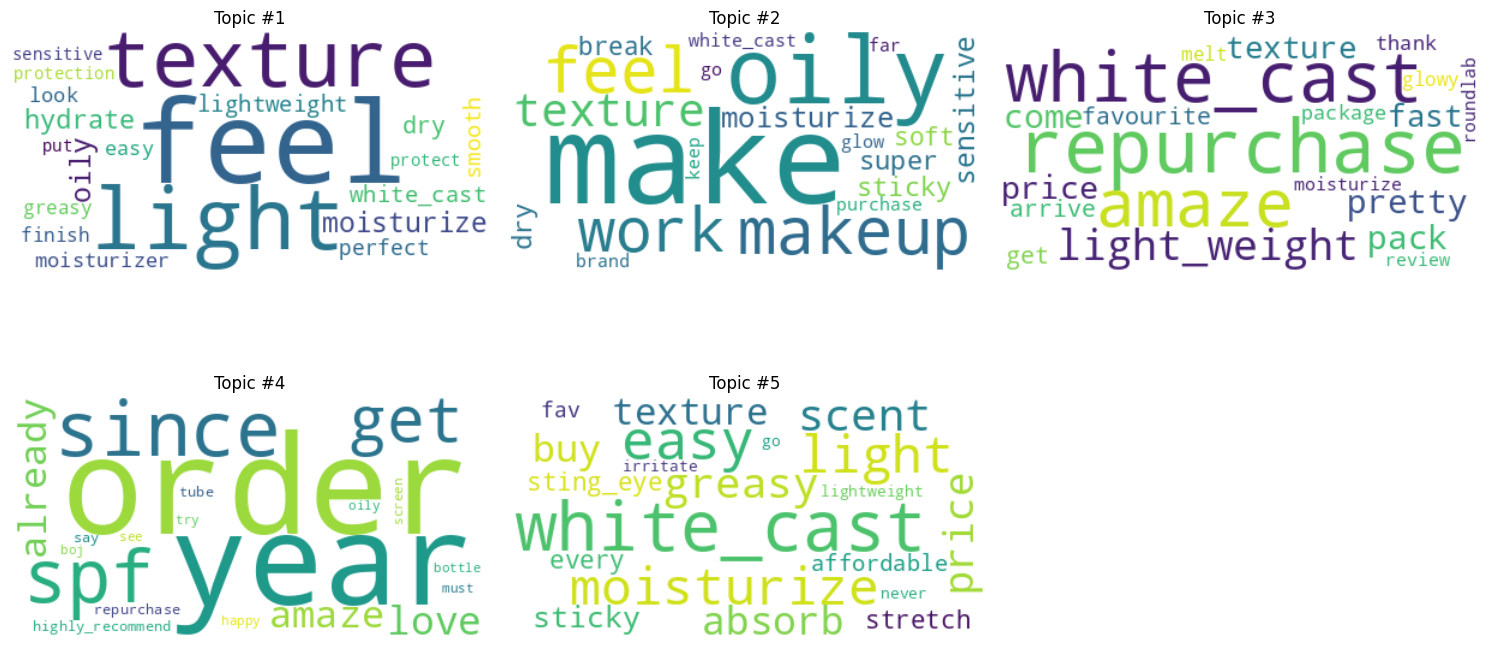


Negative Topics:
Topic #1: 0.022*"oily" + 0.021*"feel" + 0.011*"greasy" + 0.011*"burn" + 0.009*"give" + 0.009*"moisturizer" + 0.009*"white_cast" + 0.009*"wear" + 0.009*"dry" + 0.009*"look"
Topic #2: 0.016*"absorb" + 0.016*"put" + 0.013*"white_cast" + 0.012*"dry" + 0.012*"make" + 0.012*"hydrate" + 0.012*"irritate" + 0.010*"moisturize" + 0.010*"purchase" + 0.008*"protector"
Topic #3: 0.017*"dry" + 0.017*"white_cast" + 0.015*"texture" + 0.015*"oily" + 0.011*"get" + 0.011*"smell" + 0.010*"summer" + 0.010*"recommend" + 0.009*"still" + 0.009*"bad"
Topic #4: 0.022*"white_cast" + 0.019*"get" + 0.016*"sensitive" + 0.014*"moisturize" + 0.014*"oily" + 0.013*"heavy" + 0.012*"dry" + 0.010*"eye" + 0.009*"irritate" + 0.009*"however"
Topic #5: 0.033*"oily" + 0.029*"white_cast" + 0.018*"cause" + 0.014*"sticky" + 0.012*"light" + 0.011*"acne" + 0.011*"make" + 0.011*"eye" + 0.011*"breakout" + 0.010*"break"

Beauty of Joseon - Negative Topics Word Clouds:


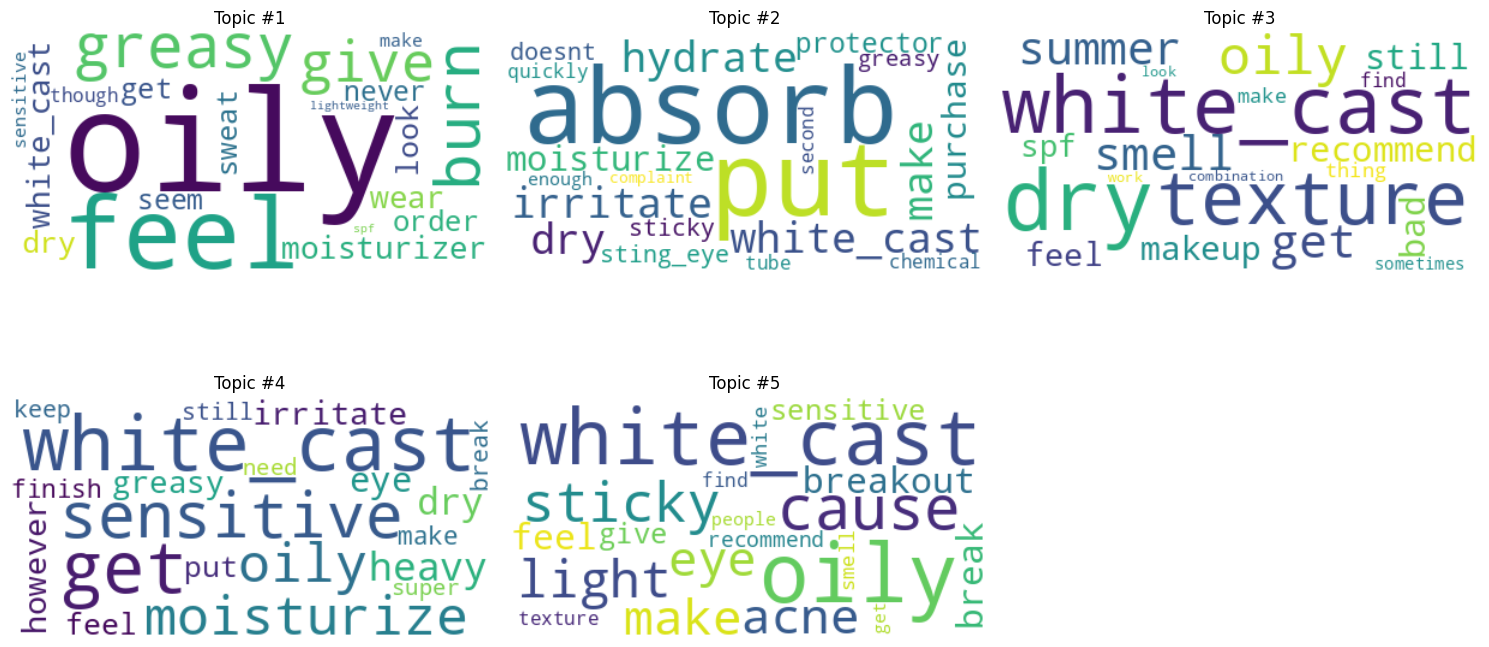


Neutral Topics:
Topic #1: 0.021*"get" + 0.020*"non_greasy" + 0.019*"sensitive" + 0.012*"dry" + 0.012*"non_sticky" + 0.012*"light_weight" + 0.009*"quickly" + 0.009*"review" + 0.009*"super" + 0.009*"feel"
Topic #2: 0.023*"texture" + 0.020*"feel" + 0.020*"white_cast" + 0.017*"moisturizer" + 0.016*"lotion" + 0.015*"look" + 0.012*"smooth" + 0.011*"light" + 0.009*"know" + 0.009*"second"
Topic #3: 0.081*"white_cast" + 0.027*"absorb" + 0.025*"moisturize" + 0.022*"oily" + 0.016*"dry" + 0.016*"absorb_quickly" + 0.014*"light_weight" + 0.013*"lightweight" + 0.012*"make" + 0.011*"light"
Topic #4: 0.040*"easy" + 0.025*"white" + 0.018*"white_cast" + 0.016*"blend" + 0.011*"makeup" + 0.010*"oily" + 0.009*"texture" + 0.009*"look" + 0.009*"absorb" + 0.009*"sticky"
Topic #5: 0.023*"white" + 0.023*"sticky" + 0.021*"light" + 0.016*"go" + 0.014*"greasy" + 0.013*"repurchase" + 0.010*"care" + 0.010*"know" + 0.010*"come" + 0.010*"pack"

Beauty of Joseon - Neutral Topics Word Clouds:


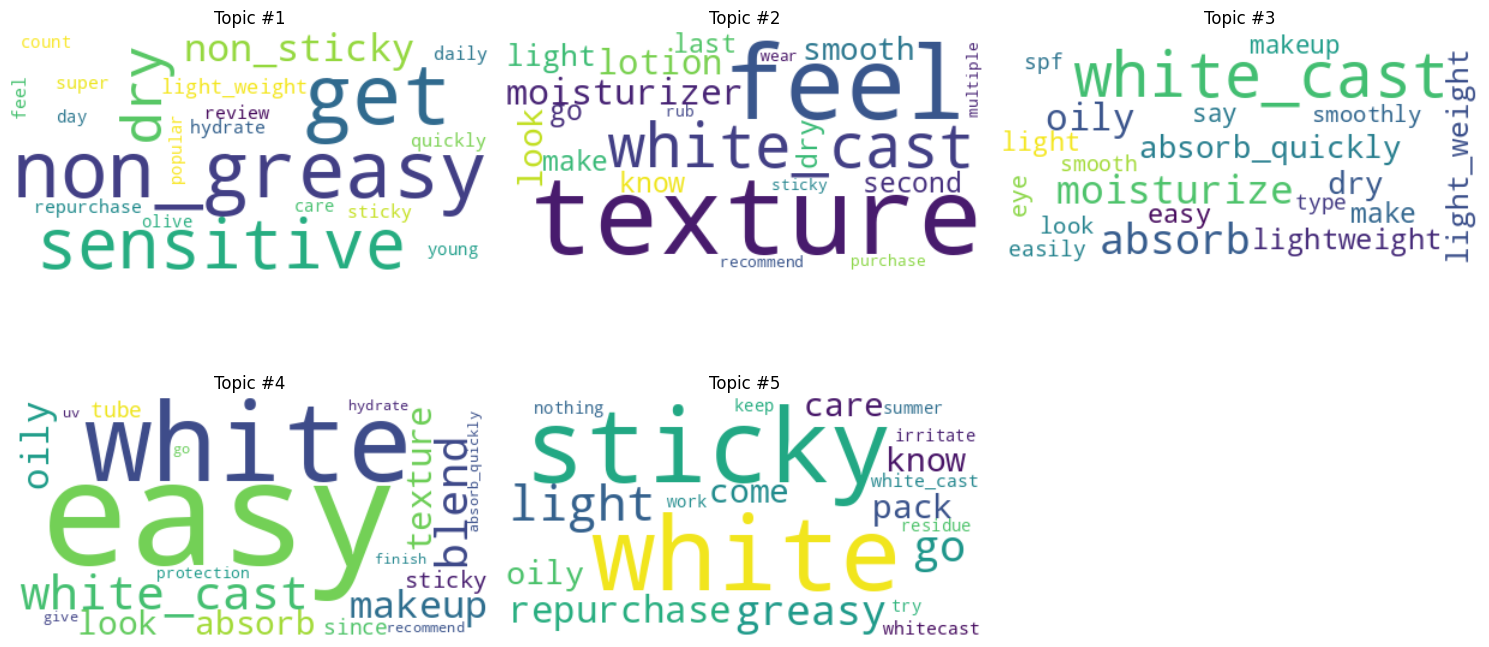


--- Preview Stopwords & Normalization for D'Alba ---


rating  \
0       3   
1       5   
2       5   
3       5   
4       5   
5       5   
6       5   
7       5   
8       5   
9       5   

                                                                                                                                                                                                           cleaned_review  \
0                                                                                                                                  a because it's recommended for dry skin i bought it i think it fits my skin color well   
1                                                                                             i bought it again because when i put this on makeup, the makeup didn't come off and the tone stayed up for a long time hehe   
2                                                                                                                                         dalba's sunscreen is famous, hehe, i really like it! i like the natural tone up   
3  it was said that chu would wear it while watching reels, so i bought it with complete anticipation, but it was really nice; it definitely toned up the face; it was pink and beige, so vibrant, and it was really nice   
4                                                                                                                 i bought it for the nth time. it moisturizes and tones up very well. i bought it as a gift for a friend   
5                                                                                                                                    i'm using size 21, but it's brighter than i thought. it rises naturally when applied   
6                                                                                                                                                                  it's easy to use, i recommend it, i would buy it again   
7                                                                                                                                it was a gift for adults, and they are using it very well because it is moist and bright   
8                                                                                                                                     it was great at first, but since i keep using it, i don't think it fits my savings.   
9                                                                                                                                  it's summer, so i chose the 1+1 composition hehe, i only use dalba as a sunscreen hehe   

                                                                  normalized_review  \
0                                                           recommend dry fit color   
1                                             put makeup makeup come tone stay long   
2                                                               famous natural tone   
3  say chu wear watch reel complete anticipation definitely tone pink beige vibrant   
4                                                   nth moisturize tone gift friend   
5                                                size brighter think rise naturally   
6                                                                    easy recommend   
7                                                           gift adult moist bright   
8                                                               since keep fit save   
9                                                         summer choose composition   

  sentiment_label  
0        positive  
1         neutral  
2        positive  
3        positive  
4        positive  
5        positive  
6        positive  
7        positive  
8        negative  
9        positive


=== D'Alba ===
Positive Topics:
Topic #1: 0.087*"tone" + 0.023*"moisturize" + 0.022*"pink" + 0.022*"easy" + 0.020*"dry" + 0.020*"moist" + 0.015*"natural" + 0.014*"famous" + 0.013*"wear" + 0.012*"recommend"
Topic #2: 0.038*"recommend" + 0.032*"sale" + 0.021*"fit" + 0.016*"thank" + 0.015*"product" + 0.015*"every" + 0.015*"keep" + 0.015*"olive_young" + 0.013*"mom" + 0.013*"event"
Topic #3: 0.050*"tone" + 0.033*"easy" + 0.030*"say" + 0.030*"moist" + 0.022*"friend" + 0.020*"gift" + 0.018*"give" + 0.012*"review" + 0.011*"soft" + 0.010*"natural"
Topic #4: 0.074*"tone" + 0.044*"makeup" + 0.033*"easy" + 0.018*"tone_naturally" + 0.016*"brighten" + 0.014*"gentle" + 0.012*"moisturize" + 0.011*"feel" + 0.010*"natural" + 0.010*"brighter"
Topic #5: 0.043*"tone" + 0.036*"easy" + 0.021*"dry" + 0.018*"recommend" + 0.018*"moisturize" + 0.016*"mom" + 0.014*"often" + 0.013*"ingredient" + 0.013*"fine" + 0.013*"look"

D'Alba - Positive Topics Word Clouds:


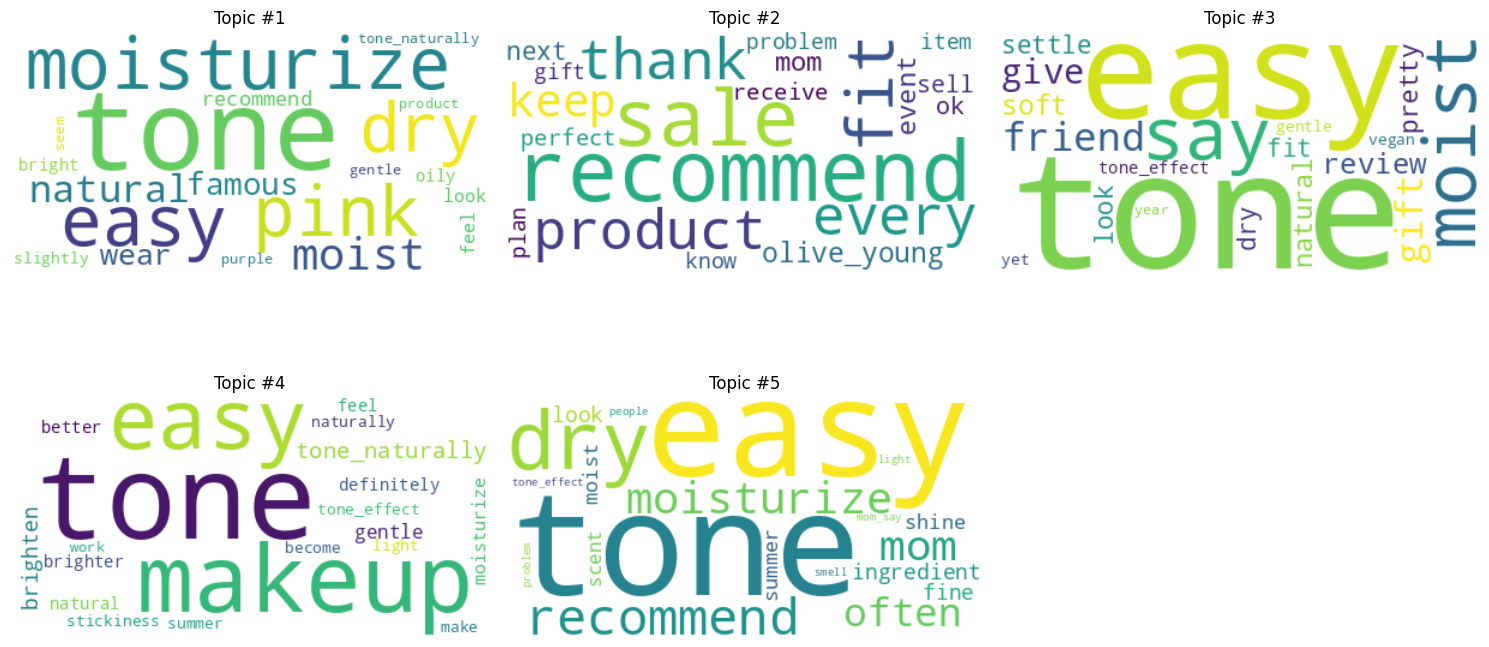


Negative Topics:
Topic #1: 0.031*"tone" + 0.018*"dry" + 0.013*"price" + 0.012*"feel" + 0.012*"oily" + 0.012*"get" + 0.009*"white" + 0.009*"bad" + 0.007*"right" + 0.007*"moist"
Topic #2: 0.050*"tone" + 0.018*"dry" + 0.018*"look" + 0.016*"irritate" + 0.013*"oil" + 0.011*"summer" + 0.010*"wear" + 0.010*"easy" + 0.009*"get" + 0.009*"makeup"
Topic #3: 0.036*"tone" + 0.018*"easy" + 0.015*"bad" + 0.015*"sticky" + 0.014*"feel" + 0.013*"moist" + 0.011*"pretty" + 0.011*"oil" + 0.010*"expensive" + 0.009*"price"
Topic #4: 0.031*"tone" + 0.023*"dry" + 0.022*"makeup" + 0.021*"oily" + 0.017*"moist" + 0.016*"recommend" + 0.013*"lol" + 0.012*"shiny" + 0.011*"get" + 0.011*"feel"
Topic #5: 0.049*"oily" + 0.034*"dry" + 0.022*"feel" + 0.016*"greasy" + 0.012*"sensitive" + 0.011*"recommend" + 0.011*"rather" + 0.009*"tone" + 0.008*"winter" + 0.008*"tea"

D'Alba - Negative Topics Word Clouds:


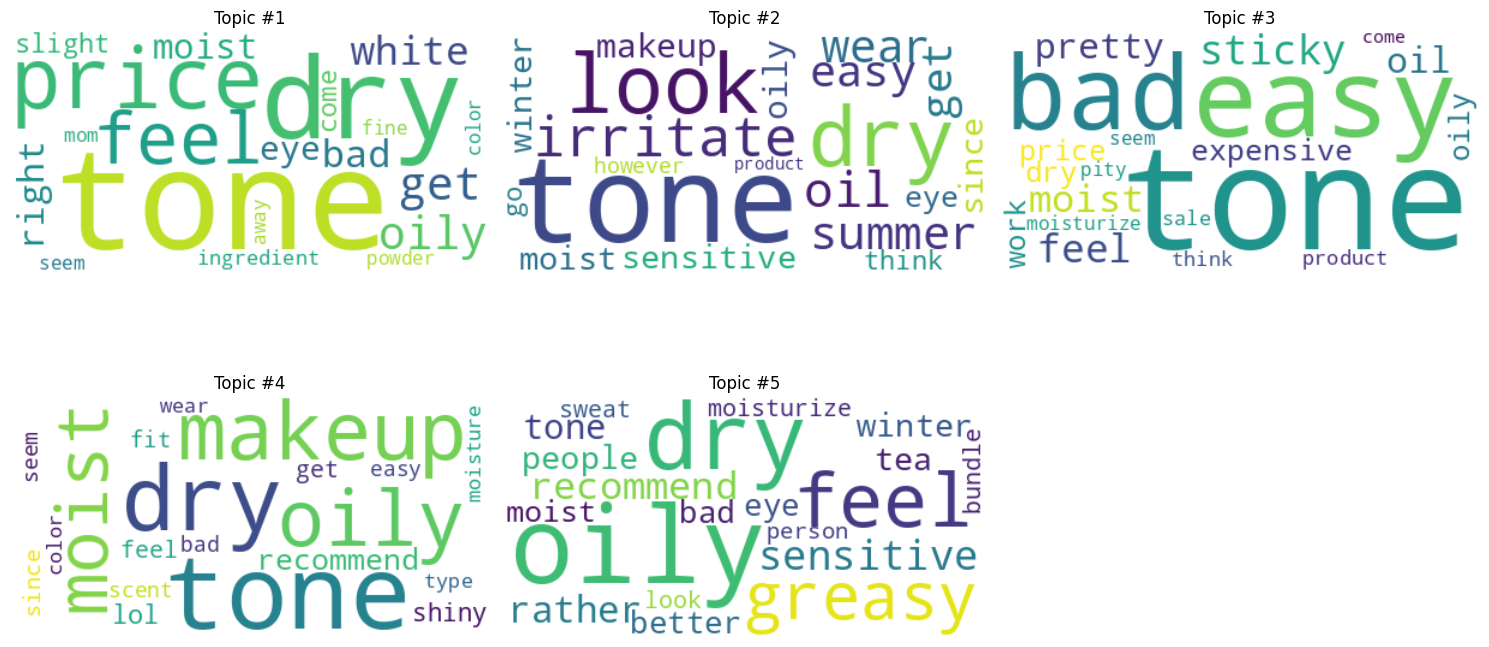


Neutral Topics:
Topic #1: 0.038*"tone" + 0.013*"make" + 0.011*"easy" + 0.010*"makeup" + 0.009*"wear" + 0.009*"recommend" + 0.009*"product" + 0.008*"oily" + 0.008*"cushion" + 0.008*"dry"
Topic #2: 0.016*"oily" + 0.016*"review" + 0.014*"easy" + 0.014*"daily" + 0.011*"moist" + 0.011*"white_spot" + 0.010*"white" + 0.010*"tone" + 0.009*"casually" + 0.009*"natural"
Topic #3: 0.070*"tone" + 0.018*"makeup" + 0.015*"dry" + 0.014*"moisturize" + 0.014*"moist" + 0.012*"look" + 0.011*"fine" + 0.011*"white" + 0.011*"easy" + 0.010*"natural"
Topic #4: 0.038*"tone" + 0.016*"pink" + 0.016*"easy" + 0.014*"know" + 0.013*"say" + 0.012*"mom" + 0.011*"get" + 0.010*"moist" + 0.009*"moisturize" + 0.008*"purple"
Topic #5: 0.016*"price" + 0.015*"tone" + 0.013*"makeup" + 0.012*"get" + 0.010*"look" + 0.010*"easy" + 0.009*"people" + 0.008*"every" + 0.008*"difference" + 0.008*"dry"

D'Alba - Neutral Topics Word Clouds:


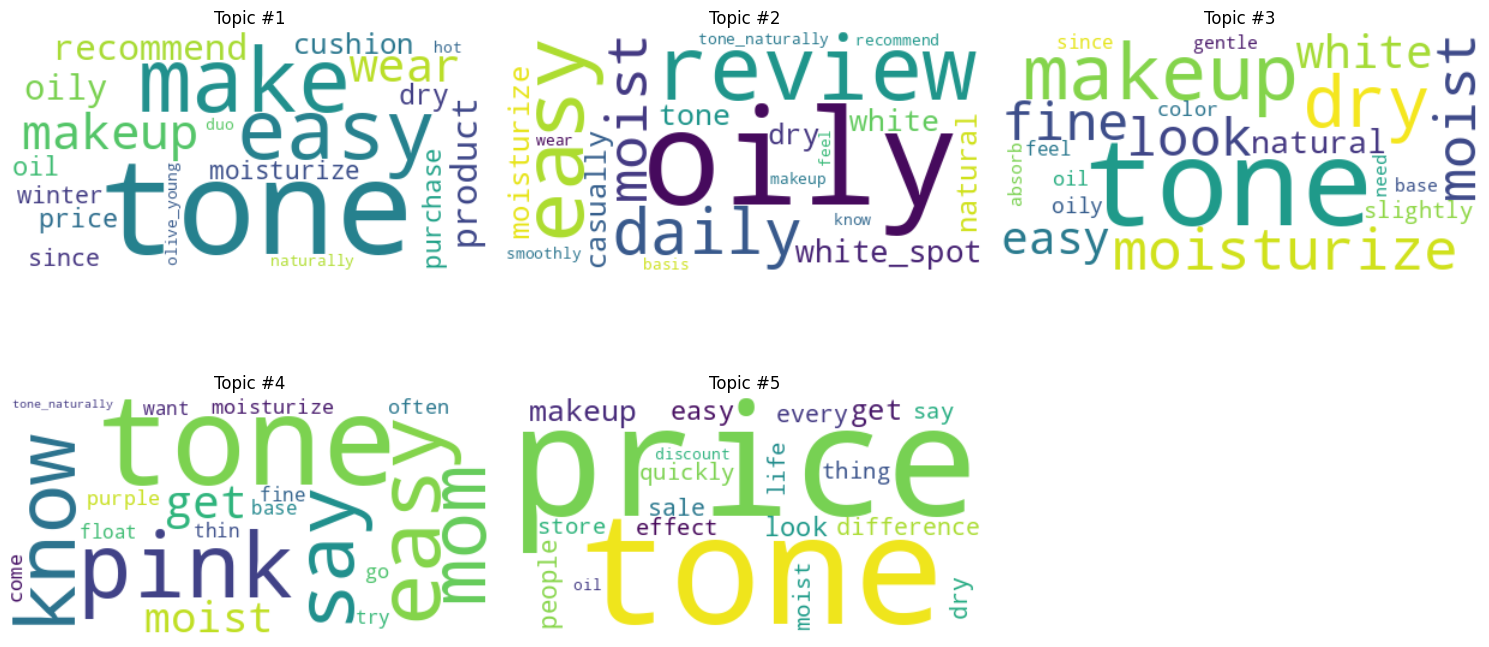

In [ ]:
import gensim
import pandas as pd
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")


# Files yang akan dipakai untuk analisis
files = {
    "Beauty of Joseon": "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_boj.xlsx",
    "D'Alba": "/content/drive/MyDrive/TextWeb Project/reviews_with_sentiment_alba.xlsx"
}

# --- FUNCTIONS ---
# Untuk memecah kalimat menjadi per kata
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# STOPWORDS
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    'like', 'liked', 'one', 'good', 'really', 'used', 'time', 'times', 'many', 'sunscreen','sunscreens',
    'skin', 'best', 'favorite', 'great', 'love', 'well', 'day', 'sun', 'use', 'leave', 'leaves',
    'tried', 'always', 'ever', 'go', 'much', 'product', 'using', 'cream', 'nice', 'buy', 'think', 'bad'
    'perfect', 'round', 'joseon', 'beauty', 'face', 'little', 'bit', 'without', 'apply', 'applied', 'applying',
    'lab', 'also', 'bought', 'dalba', 'hehe', 'lot', 'first', 'want', 'would', 'worst', 'satisfied', 'feel', 'even'
}
stop_words = stop_words.union(custom_stopwords)
# Untuk menghapus stopwords yang telah didefinisikan sebelumnya
def remove_stopwords(texts):
    return [
      [word for word in simple_preprocess(str(doc)) if word not in stop_words]
      for doc in texts
    ]

# LEMMATIZATION (Normalisasi)
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
# Untuk menormalisasi kata-kata menggunakan lemmatizer
def lemmatize_texts(texts):
    lemmatized_output = []
    for doc in texts:
        lemmatized_doc = []
        for word in doc:
            # Lemmatize sebagai Noun (default)
            word_as_noun = lemmatizer.lemmatize(word)
            # Lemmatize HASILNYA sebagai Verb
            word_as_verb = lemmatizer.lemmatize(word_as_noun, pos='v')
            lemmatized_doc.append(word_as_verb)
        lemmatized_output.append(lemmatized_doc)

    return lemmatized_output

# Bigrams Trigrams
def make_bigrams_trigrams(texts, min_count=5, threshold=5):
    bigram = Phrases(texts, min_count=min_count, threshold=threshold)
    trigram = Phrases(bigram[texts], threshold=threshold)

    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    return bigram_mod, trigram_mod


def run_lda(texts, num_topics=5):
    # Memecah menjadi kata (token)
    data_words = list(sent_to_words(texts))
    # Hapus stopwords
    data_words_nostops = remove_stopwords(data_words)
    # Normalisasi dari data_words_nostops
    data_words_lemmatized = lemmatize_texts(data_words_nostops)
    # Bigram/trigram models dari data_words_lemmatized
    bigram_mod, trigram_mod = make_bigrams_trigrams(data_words_lemmatized)
    data_final = [trigram_mod[bigram_mod[doc]] for doc in data_words_lemmatized]

    # Dictionary: mencari kata unik & memberi nomor ID
    id2word = corpora.Dictionary(data_final)
    # Corpus
    corpus = [id2word.doc2bow(text) for text in data_final]

    # LDA model
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes=10)

    return lda_model, corpus, id2word, data_final


# Untuk menampilkan wordcloud per topic
def display_topic_wordclouds(lda_model, num_topics, title_prefix=""):
    # Ambil kata dan bobotnya (bukan string)
    topics_words = lda_model.show_topics(num_topics=num_topics, num_words=20, formatted=False)

    # Atur grid plot
    cols = 3
    rows = (num_topics + cols - 1) // cols
    fig = plt.figure(figsize=(15, 4 * rows))

    print(f"\n{title_prefix}:")
    for i, (topic_id, word_weights) in enumerate(topics_words):
        # Ubah (kata, bobot) -> {kata: bobot}
        topic_dict = dict(word_weights)

        # Buat Word Cloud dari frekuensi (bobot)
        wc = WordCloud(width=400, height=200, background_color="white", colormap='viridis')
        wc.generate_from_frequencies(topic_dict)

        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(wc, interpolation="bilinear")
        ax.set_title(f"Topic #{topic_id + 1}")
        ax.axis("off")

    plt.tight_layout()
    return fig


all_results = {}
all_wordclouds = {}
# Looping semua file
for product_name, file in files.items():
    df = pd.read_excel(file)
    # Hapus baris yang null di kolom cleaned_review, pastikan string
    df = df.dropna(subset=["cleaned_review"])
    df["cleaned_review"] = df["cleaned_review"].astype(str)

    # --- PREVIEW STOPWORDS & NORMALIZATION ---
    # Ambil sebagai sampel (hanya untuk tampilan) agar tidak merubah data aslinya, jalankan ulang semua fungsinya
    df_sample = df.head(10).copy()
    sample_words = list(sent_to_words(df_sample['cleaned_review']))
    sample_nostops = remove_stopwords(sample_words)
    sample_lemmatized = lemmatize_texts(sample_nostops)
    bigram_mod_sample, trigram_mod_sample = make_bigrams_trigrams(sample_lemmatized)
    data_final_sample = [trigram_mod_sample[bigram_mod_sample[doc]] for doc in sample_lemmatized]

    # Buat kolom baru untuk normalized_review lalu tampilkan
    df_sample['normalized_review'] = [" ".join(doc) for doc in data_final_sample]
    print(f"\n--- Preview Stopwords & Normalization for {product_name} ---")
    pd.set_option('display.max_colwidth', None)
    display_cols = ['rating', 'cleaned_review', 'normalized_review', 'sentiment_label']
    display_cols_exist = [col for col in display_cols if col in df_sample.columns]
    display(df_sample[display_cols_exist])
    # --- END PREVIEW STOPWORDS & NORMALIZATION ---

    # Split data berdasarkan sentiment (pos / neu / neg)
    positive_reviews = df[df['sentiment_label']=="positive"]['cleaned_review'].tolist()
    negative_reviews = df[df['sentiment_label']=="negative"]['cleaned_review'].tolist()
    neutral_reviews  = df[df['sentiment_label']=="neutral"]['cleaned_review'].tolist()

    # Menyimpan hasil dan menjalankan LDA untuk masing-masing sentiment
    all_results[product_name] = {}
    if positive_reviews:
        # Jalankan LDA untuk masing-masing sentiment
        lda_pos, corpus_pos, id2word_pos, data_final_pos = run_lda(positive_reviews, num_topics=5)
        # Simpan hasil ke tempat yg benar: [product][sentiment]
        all_results[product_name]['positive'] = (lda_pos, corpus_pos, id2word_pos)

    if negative_reviews:
        lda_neg, corpus_neg, id2word_neg, data_final_neg = run_lda(negative_reviews, num_topics=5)
        all_results[product_name]['negative'] = (lda_neg, corpus_neg, id2word_neg)

    if neutral_reviews:
        lda_neu, corpus_neu, id2word_neu, data_final_neu = run_lda(neutral_reviews, num_topics=5)
        all_results[product_name]['neutral'] = (lda_neu, corpus_neu, id2word_neu)


    # Print topics
    print(f"\n=== {product_name} ===")
    print("Positive Topics:")
    pos_topics = lda_pos.print_topics()
    for topic_id, topic_words in pos_topics:
        print(f"Topic #{topic_id+1}: {topic_words}")
    # Buat wordcloud per topicnya
    fig_pos = display_topic_wordclouds(lda_pos, 5, title_prefix=f"{product_name} - Positive Topics Word Clouds")
    display(fig_pos) # Tampilkan figure di output Colab
    plt.close(fig_pos)

    print("\nNegative Topics:")
    neg_topics = lda_neg.print_topics()
    for topic_id, topic_words in neg_topics:
        print(f"Topic #{topic_id+1}: {topic_words}")
    fig_neg = display_topic_wordclouds(lda_neg, 5, title_prefix=f"{product_name} - Negative Topics Word Clouds")
    display(fig_neg)
    plt.close(fig_neg)

    print("\nNeutral Topics:")
    neu_topics = lda_neu.print_topics()
    for topic_id, topic_words in neu_topics:
        print(f"Topic #{topic_id+1}: {topic_words}")
    fig_neu = display_topic_wordclouds(lda_neu, 5, title_prefix=f"{product_name} - Neutral Topics Word Clouds")
    display(fig_neu)
    plt.close(fig_neu)

    # --- WORDCLOUD untuk frequent nouns setiap sentiment ---
    # Gabungkan text data yang sudah digolongkan sesuai dengan sentiment
    text_pos = " ".join([" ".join(doc) for doc in data_final_pos])
    text_neg = " ".join([" ".join(doc) for doc in data_final_neg])
    text_neu = " ".join([" ".join(doc) for doc in data_final_neu])

    # Generate wordclouds
    wc_pos = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(text_pos)
    wc_neg = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(text_neg)
    wc_neu = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(text_neu)

    # Simpan ke dict untuk visualisasi wordcloud
    all_wordclouds[product_name] = {
        "positive": wc_pos,
        "negative": wc_neg,
        "neutral": wc_neu
    }


WORDCLOUD VISUALIZATION

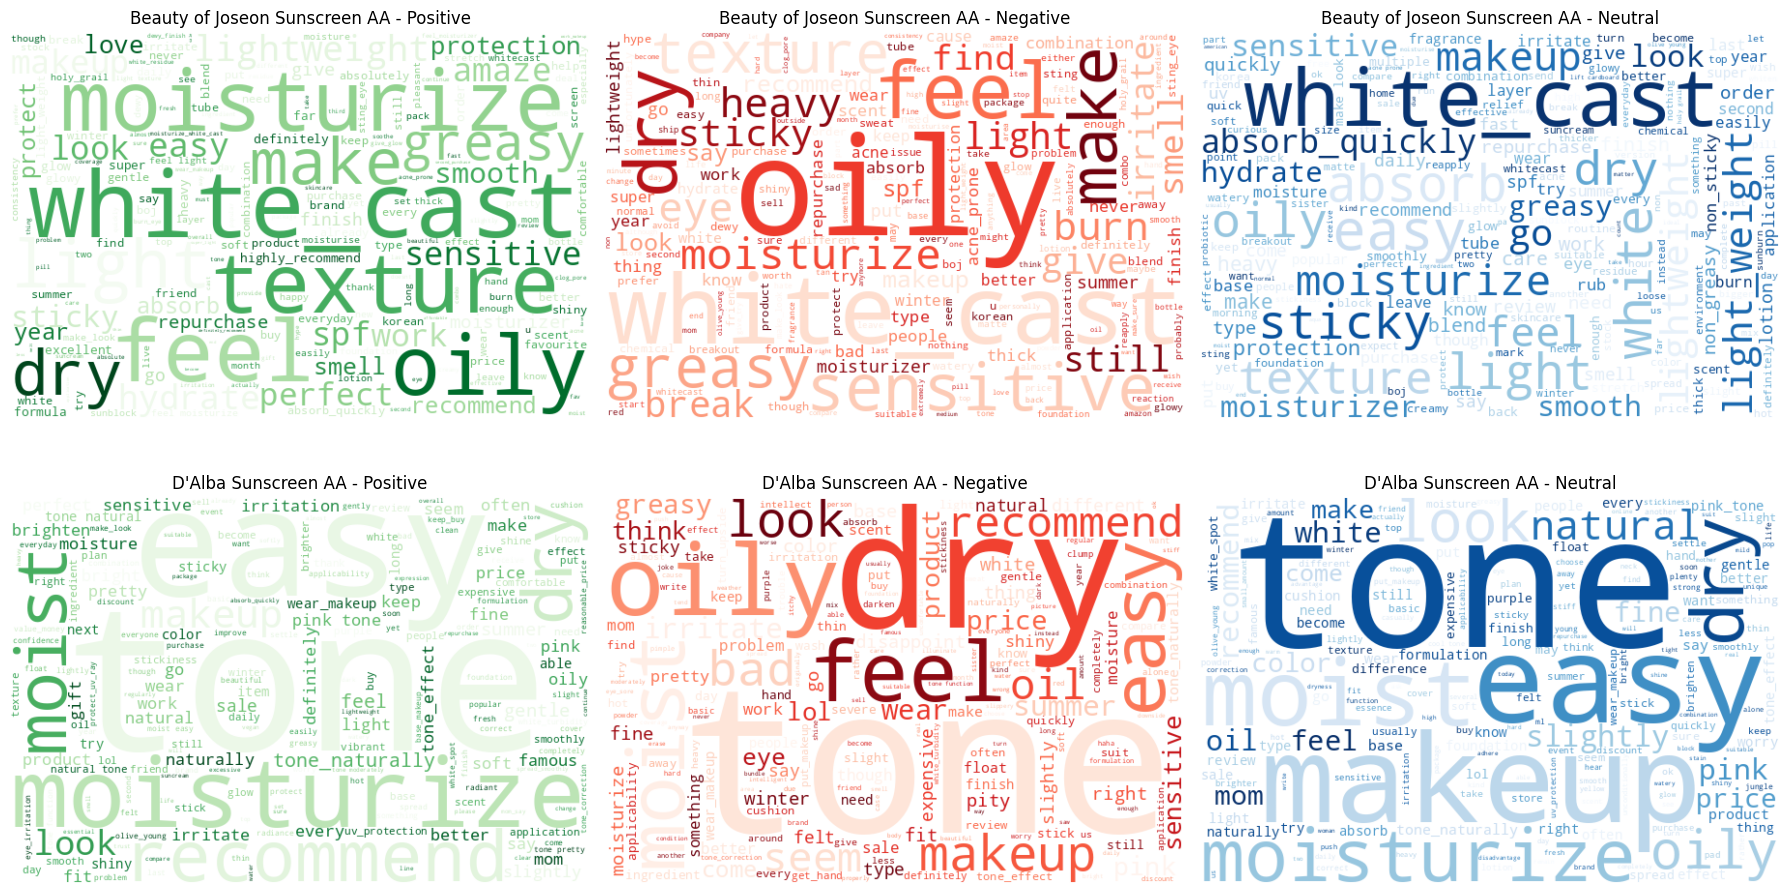

In [ ]:
# VISUALISASI WORDCLOUD
n_products = len(all_results)
fig, axes = plt.subplots(n_products, 3, figsize=(18, 5 * n_products))

# Looping untuk setiap product
for row, (product, wc_dict) in enumerate(all_wordclouds.items()):
    # Looping untuk setiap sentiment
    for col, sentiment in enumerate(["positive", "negative", "neutral"]):
        axes[row, col].imshow(wc_dict[sentiment], interpolation="bilinear")
        axes[row, col].axis("off")
        axes[row, col].set_title(f"{product} Sunscreen AA - {sentiment.capitalize()}")

plt.tight_layout()
plt.show()

**INTERACTIVE VISUALIZATION using PyLDAvis**
1. Beauty of Joseon, Positive

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "Beauty of Joseon"
sentiment_vis = "positive"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_Beauty of Joseon_positive.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.164667 -0.020897       1        1  33.646454
1     -0.099224 -0.055049       2        1  20.316107
3      0.175625 -0.186036       3        1  17.400340
4     -0.063899  0.074494       4        1  14.570080
2      0.152165  0.187488       5        1  14.067019, topic_info=           Term        Freq       Total Category  logprob  loglift
26         make  272.000000  272.000000  Default  30.0000  30.0000
12         feel  475.000000  475.000000  Default  29.0000  29.0000
24        light  387.000000  387.000000  Default  28.0000  28.0000
45   white_cast  458.000000  458.000000  Default  27.0000  27.0000
285  repurchase  153.000000  153.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
241         try   25.908513   88.182001   Topic5  -5.0716   0.7365
42      texture   41.061808  464.798582   Topic5  -4.6111  -0.4652
30   moisturize   29.120690  417.519286   Topic5  -4.9547  -0.7015
148         dry   22.907293  266.887183   Topic5  -5.1947  -0.4940
0        absorb   21.647678  127.534098   Topic5  -5.2513   0.1879

[335 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
642       1  0.177933    absolute
642       2  0.266900    absolute
642       5  0.563456    absolute
169       1  0.025679  absolutely
169       2  0.552093  absolutely
...     ...       ...         ...
168       4  0.005947        work
257       1  0.026036        year
257       2  0.173576        year
257       3  0.772415        year
257       5  0.026036        year

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [ ]:
# CODE TO EXECUTE AFTER VISUALIZATION IS STORED AS .pkl #

import pyLDAvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "Beauty of Joseon"
sentiment_vis = "positive"
num_topics = 5

# Muat hasilnya menggunakan pickle.load() (proses cepat)
load_pklfile = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(load_pklfile, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
print("Data visualization loaded successfully")

pyLDAvis.enable_notebook()
LDAvis_prepared

Data visualization loaded successfully


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.099940 -0.085404       1        1  25.061966
2      0.181836  0.140107       2        1  21.357542
4      0.079633 -0.101869       3        1  21.002966
3     -0.179541 -0.107854       4        1  18.428776
0     -0.181868  0.155020       5        1  14.148749, topic_info=            Term        Freq       Total Category  logprob  loglift
51         white  850.000000  850.000000  Default  30.0000  30.0000
4           cast  719.000000  719.000000  Default  29.0000  29.0000
55          oily  370.000000  370.000000  Default  28.0000  28.0000
66        makeup  364.000000  364.000000  Default  27.0000  27.0000
26         light  509.000000  509.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
306       korean   29.468123   76.476370   Topic5  -5.0606   1.0019
113       greasy   38.325605  268.670260   Topic5  -4.7978   0.0082
0        absorbs   37.271811  262.161157   Topic5  -4.8257   0.0048
154        super   35.288438  201.476665   Topic5  -4.8804   0.2134
172  moisturizer   27.268286  169.401652   Topic5  -5.1382   0.1290

[349 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
690       2  0.220096        able
690       4  0.770337        able
188       1  0.296975  absolutely
188       2  0.225701  absolutely
188       3  0.475160  absolutely
...     ...       ...         ...
274       1  0.090491        year
274       2  0.193909        year
274       3  0.155128        year
274       4  0.129273        year
274       5  0.426601        year

[573 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])


2.   Beauty of Joseon, Neutral



In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "Beauty of Joseon"
sentiment_vis = "neutral"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_Beauty of Joseon_neutral.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.119703  0.026715       1        1  26.785596
3      0.055704  0.039137       2        1  25.070215
1     -0.022677 -0.128114       3        1  20.349825
0     -0.113181  0.079054       4        1  14.456352
4     -0.039549 -0.016792       5        1  13.338012, topic_info=           Term       Freq      Total Category  logprob  loglift
68   white_cast  70.000000  70.000000  Default  30.0000  30.0000
119        easy  30.000000  30.000000  Default  29.0000  29.0000
117       white  24.000000  24.000000  Default  28.0000  28.0000
145  moisturize  17.000000  17.000000  Default  27.0000  27.0000
134  non_greasy   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
68   white_cast   2.620106  70.626569   Topic5  -4.7089  -1.2796
407        acne   1.518173   5.870227   Topic5  -5.2546   0.6622
248  protection   1.517575  10.500797   Topic5  -5.2550   0.0802
126        give   1.516231   8.168170   Topic5  -5.2558   0.3305
358          uv   1.514143   6.771689   Topic5  -5.2572   0.5167

[318 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
40        1  0.679642          absorb
40        2  0.212388          absorb
40        4  0.084955          absorb
40        5  0.042478          absorb
132       1  0.657477  absorb_quickly
...     ...       ...             ...
97        5  0.225869            work
39        1  0.193677             yet
39        3  0.387355             yet
39        4  0.387355             yet
130       4  0.697417           young

[458 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1, 5])


3. Beauty of Joseon, Negative



In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "Beauty of Joseon"
sentiment_vis = "negative"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_Beauty of Joseon_negative.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044414  0.050538       1        1  26.936221
3     -0.015551 -0.084522       2        1  23.696961
4      0.097343 -0.039028       3        1  20.588734
2     -0.018971  0.091426       4        1  20.347459
1     -0.107234 -0.018414       5        1   8.430625, topic_info=         Term       Freq      Total Category  logprob  loglift
111     cause  20.000000  20.000000  Default  30.0000  30.0000
290       put  18.000000  18.000000  Default  29.0000  29.0000
315  irritate  21.000000  21.000000  Default  28.0000  28.0000
75     absorb  19.000000  19.000000  Default  27.0000  27.0000
8         dry  47.000000  47.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
90     makeup   2.118521  21.488772   Topic5  -5.2387   0.1565
63       feel   2.252894  55.433860   Topic5  -5.1772  -0.7297
36    texture   2.174159  35.275973   Topic5  -5.2128  -0.3133
93       oily   2.231760  92.618985   Topic5  -5.1866  -1.2524
318      burn   2.109588  28.338098   Topic5  -5.2429  -0.1244

[350 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
75        1  0.153292  absorb
75        2  0.153292  absorb
75        3  0.255487  absorb
75        4  0.153292  absorb
75        5  0.306585  absorb
...     ...       ...     ...
102       3  0.496394   worth
102       4  0.248197   worth
339       1  0.337956    year
339       2  0.405548    year
339       3  0.202774    year

[578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

4. D'Alba, Positive

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "D'Alba"
sentiment_vis = "positive"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_D'Alba_positive.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.110698  0.016391       1        1  33.436099
3     -0.132579  0.092452       2        1  25.633125
2     -0.012268 -0.209767       3        1  13.852196
4     -0.023038  0.055094       4        1  13.562731
1      0.278582  0.045830       5        1  13.515849, topic_info=          Term        Freq       Total Category  logprob  loglift
78      makeup  194.000000  194.000000  Default  30.0000  30.0000
6         tone  991.000000  991.000000  Default  29.0000  29.0000
3    recommend  198.000000  198.000000  Default  28.0000  28.0000
98        sale   80.000000   80.000000  Default  27.0000  27.0000
14         say   68.000000   68.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
65     perfect   22.579259   76.222565   Topic5  -4.5821   0.7847
19        gift   20.660503   67.231683   Topic5  -4.6709   0.8214
118        get   20.413414   87.802692   Topic5  -4.6829   0.5424
1          dry   18.417999  219.002542   Topic5  -4.7858  -0.4744
59         try   15.510683   42.409983   Topic5  -4.9576   0.9955

[335 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
112       1  0.076478    absorb
112       2  0.917741    absorb
1333      5  0.921610      acne
1118      3  0.908224  actually
28        3  0.908025     adult
...     ...       ...       ...
240       2  0.049711       yet
240       3  0.894794       yet
51        1  0.111526    yogurt
51        3  0.892209    yogurt
483       5  0.943353     young

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 2])

5. D'Alba, Neutral

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "D'Alba"
sentiment_vis = "neutral"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_D'Alba_neutral.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.069487 -0.082666       1        1  34.619503
4     -0.114015  0.035744       2        1  23.248856
0      0.075190  0.080181       3        1  20.295625
3     -0.046174 -0.069816       4        1  11.836425
1      0.015512  0.036557       5        1   9.999591, topic_info=       Term        Freq       Total Category  logprob  loglift
5      tone  164.000000  164.000000  Default  30.0000  30.0000
36     oily   27.000000   27.000000  Default  29.0000  29.0000
79     pink   22.000000   22.000000  Default  28.0000  28.0000
11   review   14.000000   14.000000  Default  27.0000  27.0000
93     know   14.000000   14.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
2    makeup    2.905282   49.551682   Topic5  -4.9319  -0.5339
30     type    2.226117   11.195298   Topic5  -5.1981   0.6874
61      oil    2.226587   26.859419   Topic5  -5.1979  -0.1875
165   light    2.221725   13.427397   Topic5  -5.2001   0.5036
367   right    2.221461   13.018573   Topic5  -5.2002   0.5344

[360 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
118       1  0.798610    absorb
118       2  0.079861    absorb
118       3  0.079861    absorb
118       5  0.079861    absorb
330       1  0.176205  actually
...     ...       ...       ...
230       2  0.442348     woman
230       4  0.442348     woman
900       1  0.844694    yellow
537       1  0.329111    yogurt
537       4  0.658222    yogurt

[590 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

6. D'Alba, Negative

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Inisiasi product & sentiment yang akan divisualisasikan
product_vis = "D'Alba"
sentiment_vis = "negative"
num_topics = 5

# Ambil data dari hasil yang telah disimpan sebelumnya
if product_vis in all_results and sentiment_vis in all_results[product_vis]:
  lda_model, corpus, id2word = all_results[product_vis][sentiment_vis]

# Persiapan visualisasi
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Menyimpan data yang sudah disiapkan (untuk dimuat ulang nanti jika perlu) dalam bentuk file .pkl
LDAvis_data_filepath = f"/content/drive/MyDrive/TextWeb Project/LDAvis_{product_vis}_{sentiment_vis}.pkl"

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
print(f"Data visualization has been saved to: {LDAvis_data_filepath}")

# Tampilkan visualisasi interaktif
pyLDAvis.enable_notebook()
LDAvis_prepared


Data visualization has been saved to: /content/drive/MyDrive/TextWeb Project/LDAvis_D'Alba_negative.pkl


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.031186 -0.088212       1        1  27.161130
3      0.064543  0.057287       2        1  21.160771
2     -0.129035  0.006756       3        1  20.682234
0      0.012973  0.076931       4        1  19.670833
4      0.020333 -0.052763       5        1  11.325031, topic_info=          Term       Freq      Total Category  logprob  loglift
14        oily  74.000000  74.000000  Default  30.0000  30.0000
71         dry  86.000000  86.000000  Default  29.0000  29.0000
15      sticky  15.000000  15.000000  Default  28.0000  28.0000
10   recommend  29.000000  29.000000  Default  27.0000  27.0000
149     greasy  23.000000  23.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
0          fit   2.681021  17.073241   Topic5  -5.2455   0.3268
63      makeup   2.880712  41.210332   Topic5  -5.1736  -0.4825
325      right   2.632314  17.952107   Topic5  -5.2638   0.2583
20         get   2.767834  37.073218   Topic5  -5.2136  -0.4167
56        easy   2.730826  42.102810   Topic5  -5.2271  -0.5574

[361 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
710       2  0.911239  absolutely
805       5  0.641516    adhesion
738       5  0.864561       adult
16        1  0.241557   advertise
16        3  0.724671   advertise
...     ...       ...         ...
631       2  0.134812       worry
631       3  0.134812       worry
631       4  0.674059       worry
900       5  0.641344          yu
841       1  0.801209        zone

[600 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])